# Task 1

In this notebook, the following has been done:
1. Retrieving an image based on ImageID
2. Computation of Color moments, CM8x8 for given imageID
3. Computation of Extended Local binary patterns, ELBP for given imageID
4. Histograms of oriented gradients, HOG for given imageID

***

### Inputs Required

In [1]:
IMAGE_ID = "0_0" # In the format: <subjectId, imageId>
MODEL = "hog" # ["cm8x8", "elbp", "hog"]

***

In [2]:
# Imports

import os
import sys
import scipy
import Utils
import skimage
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path
from skimage.feature import hog, local_binary_pattern

In [3]:
# Global Constants

CURRENT_PATH = Path(os.getcwd())
IMGS_DIR = CURRENT_PATH.parent / "Outputs" / "Task0" / "Images"
TARGET_DIR = CURRENT_PATH.parent / "Outputs" / "Task0" / "Target"

WRITE_DIR =  CURRENT_PATH.parent / "Outputs" / "Task1" 

In [4]:
# Create WRITE_DIR if it does not exist

WRITE_DIR.mkdir(parents=True, exist_ok=True)

## 1.  Retrieving an image based on Image ID

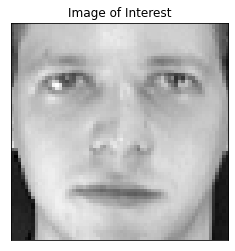

In [5]:
# Retrieving Image

file_name = IMAGE_ID + ".tif"
image_path = IMGS_DIR / file_name
image = Image.open(str(image_path))
np_image = np.array(image)

# Plotting Image
plt.imshow(np_image, cmap='gray')
plt.title("Image of Interest")
plt.xticks([])
plt.yticks([])
plt.show()

## 2. Computation of Color moments, CM8x8

In [6]:
if MODEL == "cm8x8":
    # Creation on 64 windows (8x8) from original image
    windows = Utils.create_windows(np_image)

    # Calculating mean, std. deviation and skewness for each 8x8 window
    color_moments = np.array(Utils.calculate_color_moments(windows))
    color_moments_reshaped = np.reshape(color_moments, (3,64))

    fig, ax = plt.subplots(nrows=8, ncols=8, figsize=(17, 17))
    ax = ax.flatten()

    for index in range(0,len(windows)):
        # Extracting window
        window = windows[index]

        # Plotting results in a figure
        ax[index].imshow(window, cmap='gray')
        ax[index].set_xticks([])
        ax[index].set_yticks([])
        ax[index].set_title("Mean: {:.2f}\nStd: {:.2f}\nSkew: {:.2f}".format(color_moments_reshaped[0][index],color_moments_reshaped[1][index],color_moments_reshaped[2][index]), fontsize=8.5)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)
    
    # Write path for color moments
    color_moments_write_path = WRITE_DIR / "color_moments.csv"
    color_moments_img_write_path = WRITE_DIR / "color_moments.png"
    
    # Writing results into a file
    Utils.write_color_moments(data=color_moments, path=color_moments_write_path)
    fig.savefig(color_moments_img_write_path)

## 3. Computation of Extended Local binary patterns, ELBP for given imageID

In [7]:
if MODEL == "elbp":

    # Calculation of ELBP for the image of interest
    points = 8
    radius = 1
    method = 'ror'
    elbp = local_binary_pattern(image, P=points, R=radius, method=method)
    bins, bining_results = Utils.calculate_elbp(image=np_image, points=points, radius=radius, method=method)
    
    # Plotting bining results of ELBP

    plt.figure(figsize=(15,7))
    plt.bar(bining_results[1][1:], bining_results[0] ,width=2)
    plt.xticks(np.arange(0, 270, 10))
    plt.xlabel("ELBP Values")
    plt.ylabel("Frequency")
    plt.title("Plotting ELBP Feature Descriptor")

    elbp_img_write_path = WRITE_DIR / "elbp.png"
    plt.gcf().savefig(elbp_img_write_path)
    
    # Write path for ELBP
    elbp_write_path = WRITE_DIR / "elbp.csv"
    # Writing results into a file# Writing results into a file
    Utils.write_elbp(bining_results=bining_results, path=elbp_write_path)

# 4. Histograms of oriented gradients, HOG for given imageID

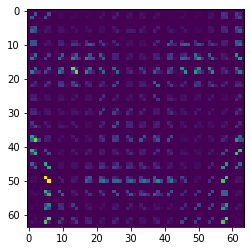

In [8]:
if MODEL == "hog":
    # Calculating hog feature descriptor
    fd, hog_image = Utils.calculate_hog(np_image, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2,2))
    
    # Plot HOG image
    plt.imshow(hog_image)
    
    # Save HOG image
    hog_img_write_path = WRITE_DIR / "hog.png"
    plt.gcf().savefig(hog_img_write_path)
    
    # Write path for HOG
    hog_write_path = WRITE_DIR / "hog.csv"
    # Writing results into a file
    Utils.write_hog(path=hog_write_path, feature_values=fd)